In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = '/Users/amykillin/Desktop/Mark Career Foundry Data/Data Immersion/Topic 6/'

In [6]:
# Import the Dataframe

df = pd.read_excel(os.path.join(path, 'UFC Archive 1993-2021', 'UFC Remixes', 'UFC_Complete_Sheet_for_Pandas.xlsx'))

In [7]:
df

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_Landed,R_SIG_STR_Thrown,B_SIG_STR_Landed,B_SIG_STR_Thrown,R_TOTAL_STR_Landed,R_TOTAL_STR_Thrown,...,B_CTRL,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Adrian Yanez,Gustavo Lopez,2,0,41,103,23,51,41,103,...,00:00:00,KO/TKO,3,00:27:00,3 Rnd (5-5-5),Chris Tognoni,"March 20, 2021","Las Vegas, Nevada, USA",Bantamweight Bout,Adrian Yanez
1,Trevin Giles,Roman Dolidze,0,0,27,57,32,67,43,73,...,04:15:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Middleweight Bout,Trevin Giles
2,Tai Tuivasa,Harry Hunsucker,1,0,14,18,2,6,14,18,...,00:00:00,KO/TKO,1,00:49:00,3 Rnd (5-5-5),Herb Dean,"March 20, 2021","Las Vegas, Nevada, USA",Heavyweight Bout,Tai Tuivasa
3,Cheyanne Buys,Montserrat Conejo,0,0,31,65,15,41,49,87,...,09:53:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Strawweight Bout,Montserrat Conejo
4,Marion Reneau,Macy Chiasson,0,0,30,63,51,138,59,93,...,03:48:00,Decision - Unanimous,3,05:00:00,3 Rnd (5-5-5),Mark Smith,"March 20, 2021","Las Vegas, Nevada, USA",Women's Bantamweight Bout,Macy Chiasson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6007,Remco Pardoel,Alberta Cerra Leon,0,0,4,6,1,3,20,22,...,--,Submission,1,09:51:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Remco Pardoel
6008,Orlando Wiet,Robert Lucarelli,0,0,8,12,2,6,11,15,...,--,KO/TKO,1,02:50:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Orlando Wiet
6009,Johnny Rhodes,David Levicki,0,0,11,17,4,5,74,86,...,--,KO/TKO,1,12:13:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Johnny Rhodes
6010,Patrick Smith,Ray Wizard,0,0,1,1,1,1,1,1,...,--,Submission,1,00:58:00,No Time Limit,John McCarthy,"March 11, 1994","Denver, Colorado, USA",Open Weight Bout,Patrick Smith


In [8]:
#cleaning the data

In [9]:
df.shape

(6012, 31)

In [10]:
df.isnull().sum()

R_fighter               0
B_fighter               0
R_KD                    0
B_KD                    0
R_SIG_STR_Landed        0
R_SIG_STR_Thrown        0
B_SIG_STR_Landed        0
B_SIG_STR_Thrown        0
R_TOTAL_STR_Landed      0
R_TOTAL_STR_Thrown      0
B_TOTAL_STR_Landed      0
B_TOTAL_STR_Thrown      0
R_TD_Secured            0
R_TD_Attempted          0
B_TD_Secured            0
B_TD_Attempted          0
R_SUB_ATT               0
B_SUB_ATT               0
R_REV                   0
B_REV                   0
R_CTRL                  0
B_CTRL                  0
win_by                  0
last_round              0
last_round_time         0
Format                  0
Referee                32
date                    0
location                0
Fight_type              0
Winner                110
dtype: int64

In [11]:
df = df.drop(columns = ['Referee'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   R_fighter           6012 non-null   object
 1   B_fighter           6012 non-null   object
 2   R_KD                6012 non-null   int64 
 3   B_KD                6012 non-null   int64 
 4   R_SIG_STR_Landed    6012 non-null   int64 
 5   R_SIG_STR_Thrown    6012 non-null   int64 
 6   B_SIG_STR_Landed    6012 non-null   int64 
 7   B_SIG_STR_Thrown    6012 non-null   int64 
 8   R_TOTAL_STR_Landed  6012 non-null   int64 
 9   R_TOTAL_STR_Thrown  6012 non-null   int64 
 10  B_TOTAL_STR_Landed  6012 non-null   int64 
 11  B_TOTAL_STR_Thrown  6012 non-null   int64 
 12  R_TD_Secured        6012 non-null   int64 
 13  R_TD_Attempted      6012 non-null   int64 
 14  B_TD_Secured        6012 non-null   int64 
 15  B_TD_Attempted      6012 non-null   int64 
 16  R_SUB_ATT           6012

In [13]:
df = df.dropna()

In [15]:
df.isnull().sum()

R_fighter             0
B_fighter             0
R_KD                  0
B_KD                  0
R_SIG_STR_Landed      0
R_SIG_STR_Thrown      0
B_SIG_STR_Landed      0
B_SIG_STR_Thrown      0
R_TOTAL_STR_Landed    0
R_TOTAL_STR_Thrown    0
B_TOTAL_STR_Landed    0
B_TOTAL_STR_Thrown    0
R_TD_Secured          0
R_TD_Attempted        0
B_TD_Secured          0
B_TD_Attempted        0
R_SUB_ATT             0
B_SUB_ATT             0
R_REV                 0
B_REV                 0
R_CTRL                0
B_CTRL                0
win_by                0
last_round            0
last_round_time       0
Format                0
date                  0
location              0
Fight_type            0
Winner                0
dtype: int64

In [16]:
dups = df.duplicated()

In [17]:
dups

0       False
1       False
2       False
3       False
4       False
        ...  
6007    False
6008    False
6009    False
6010    False
6011    False
Length: 5902, dtype: bool

In [18]:
#Data is clean

In [21]:
#I want to explore the knockdowns vs number of rounds, 
#i.e. the longer the fight (more rounds), the more the knock-downs

In [24]:
df['Total_KD'] = (df['B_KD']+df['R_KD'])
print(df['Total_KD'])

0       2
1       0
2       1
3       0
4       0
       ..
6007    0
6008    0
6009    0
6010    0
6011    0
Name: Total_KD, Length: 5902, dtype: int64


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5902 entries, 0 to 6011
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   R_fighter           5902 non-null   object
 1   B_fighter           5902 non-null   object
 2   R_KD                5902 non-null   int64 
 3   B_KD                5902 non-null   int64 
 4   R_SIG_STR_Landed    5902 non-null   int64 
 5   R_SIG_STR_Thrown    5902 non-null   int64 
 6   B_SIG_STR_Landed    5902 non-null   int64 
 7   B_SIG_STR_Thrown    5902 non-null   int64 
 8   R_TOTAL_STR_Landed  5902 non-null   int64 
 9   R_TOTAL_STR_Thrown  5902 non-null   int64 
 10  B_TOTAL_STR_Landed  5902 non-null   int64 
 11  B_TOTAL_STR_Thrown  5902 non-null   int64 
 12  R_TD_Secured        5902 non-null   int64 
 13  R_TD_Attempted      5902 non-null   int64 
 14  B_TD_Secured        5902 non-null   int64 
 15  B_TD_Attempted      5902 non-null   int64 
 16  R_SUB_ATT           5902

/var/folders/4r/1lzl881j3rxcxvg9h9jmpg6r0000gn/T/ipykernel_37717/3194180997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_KD'], bins=25) # Shows extreme values


<Axes: xlabel='Total_KD', ylabel='Density'>

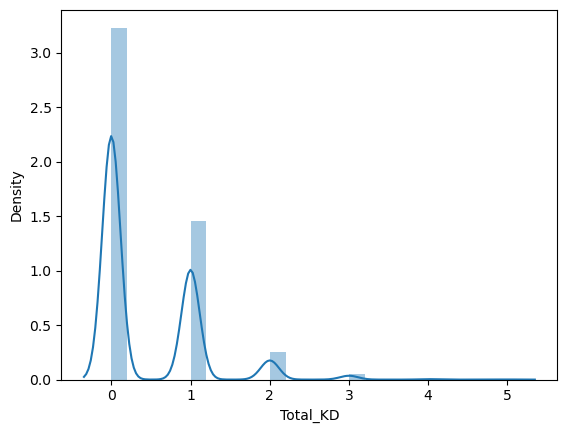

In [26]:
sns.distplot(df['Total_KD'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [27]:
df['Total_KD'].mean() # Check the mean

0.4298542866824805

In [28]:
df['Total_KD'].median() # Check the median

0.0

In [29]:
df['Total_KD'].max() # Check the max

5

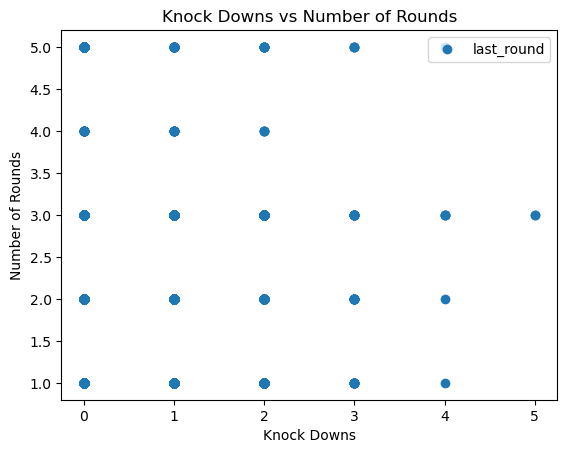

In [30]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total_KD', y='last_round',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Knock Downs vs Number of Rounds')  
plt.xlabel('Knock Downs')  
plt.ylabel('Number of Rounds')  
plt.show()

In [31]:
# Not much to really go on there

In [32]:
# Try the same thing but for Knockdowns vs strikes thrown

In [33]:
df['Total_Strikes'] = (df['R_TOTAL_STR_Thrown']+df['B_TOTAL_STR_Thrown'])
print(df['Total_Strikes'])

0       154
1       183
2        24
3       255
4       277
       ... 
6007     33
6008     21
6009    188
6010      3
6011      7
Name: Total_Strikes, Length: 5902, dtype: int64


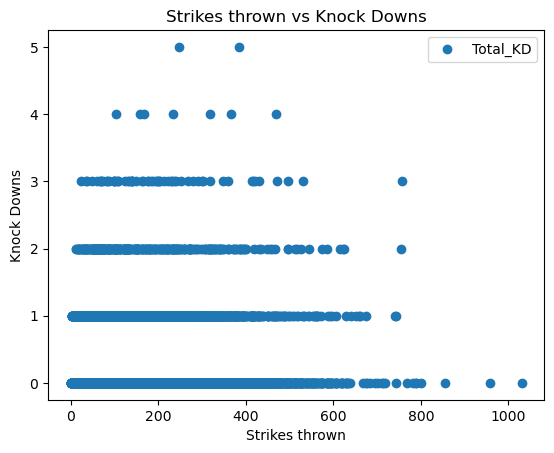

In [34]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total_Strikes', y='Total_KD',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Strikes thrown vs Knock Downs')  
plt.xlabel('Strikes thrown')  
plt.ylabel('Knock Downs')  
plt.show()

In [35]:
#Knock downs are limited in numbers, so its not as complex to get insight

In [36]:
# Strikes thrown vs significant strikes landed

In [37]:
df['Total_Landed_sig'] = (df['B_SIG_STR_Landed']+df['R_SIG_STR_Landed'])
print(df['Total_Landed_sig'])

0       64
1       59
2       16
3       46
4       81
        ..
6007     5
6008    10
6009    15
6010     2
6011     1
Name: Total_Landed_sig, Length: 5902, dtype: int64


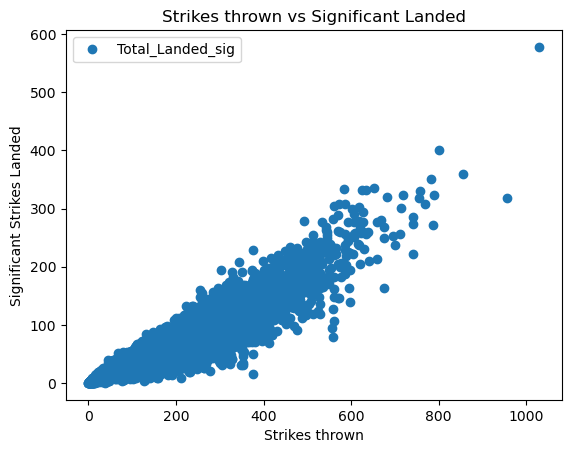

In [38]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Total_Strikes', y='Total_Landed_sig',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Strikes thrown vs Significant Landed')  
plt.xlabel('Strikes thrown')  
plt.ylabel('Significant Strikes Landed')  
plt.show()

/var/folders/4r/1lzl881j3rxcxvg9h9jmpg6r0000gn/T/ipykernel_37717/3584567473.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Total_Strikes'], bins=25) # Shows extreme values


<Axes: xlabel='Total_Strikes', ylabel='Density'>

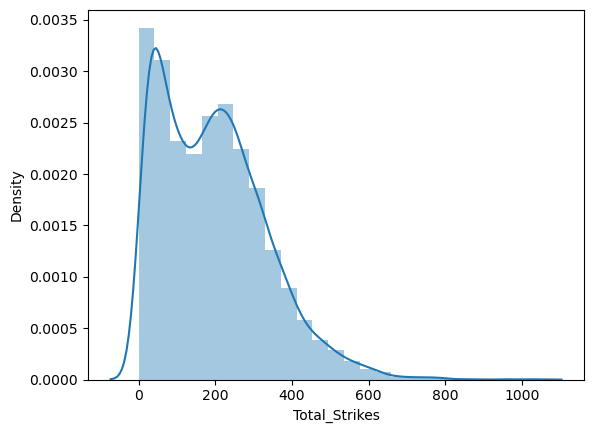

In [39]:
sns.distplot(df['Total_Strikes'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [40]:
df['Total_Strikes'].max() # Check the max

1030

In [41]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Total_Strikes'].values.reshape(-1,1)
y = df['Total_Landed_sig'].values.reshape(-1,1)

In [42]:
X

array([[154],
       [183],
       [ 24],
       ...,
       [188],
       [  3],
       [  7]])

In [44]:
y

array([[64],
       [59],
       [16],
       ...,
       [15],
       [ 2],
       [ 1]])

In [45]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [47]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

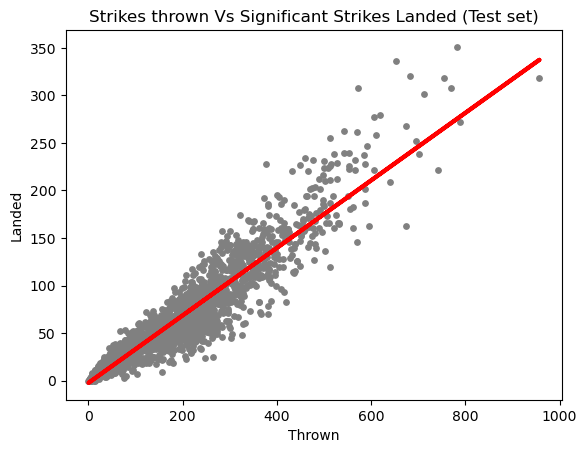

In [49]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Strikes thrown Vs Significant Strikes Landed (Test set)')
plot_test.xlabel('Thrown')
plot_test.ylabel('Landed')
plot_test.show()

In [50]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [51]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35515144]]
Mean squared error:  386.3534615690214
R2 score:  0.871611954390268


In [52]:
y_predicted

array([[102.65993188],
       [ 62.52781864],
       [  0.37631584],
       ...,
       [  3.92783029],
       [ 91.6502371 ],
       [ 73.53751343]])

In [53]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,82,102.659932
1,51,62.527819
2,7,0.376316
3,72,73.182362
4,121,122.903564
5,12,9.255102
6,33,34.470855
7,126,120.772656
8,3,-0.689138
9,14,18.844191


In [54]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [55]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [56]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35515144]]
Mean squared error:  454.3162615846426
R2 score:  0.8379094619448741


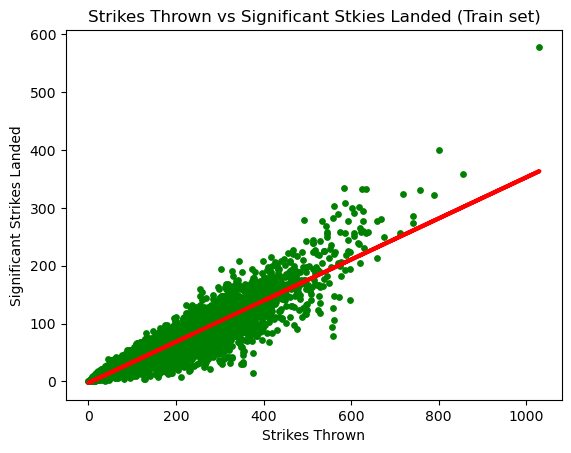

In [57]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Strikes Thrown vs Significant Stkies Landed (Train set)')
plot_test.xlabel('Strikes Thrown')
plot_test.ylabel('Significant Strikes Landed')
plot_test.show()

In [58]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Total_Landed_sig'] <=500] 

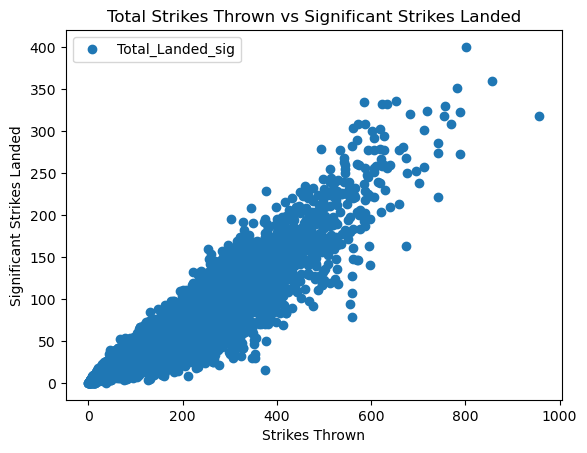

In [59]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Total_Strikes', y='Total_Landed_sig', style='o')  
plt.title('Total Strikes Thrown vs Significant Strikes Landed')  
plt.xlabel('Strikes Thrown')  
plt.ylabel('Significant Strikes Landed')  
plt.show()

In [60]:
# Reshape again.

X_2 = df_test['Total_Strikes'].values.reshape(-1,1)
y_2 = df_test['Total_Landed_sig'].values.reshape(-1,1)

In [62]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [63]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [64]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [65]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [66]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.35049843]]
Mean squared error:  434.9523933006195
R2 score:  0.8592890387568579


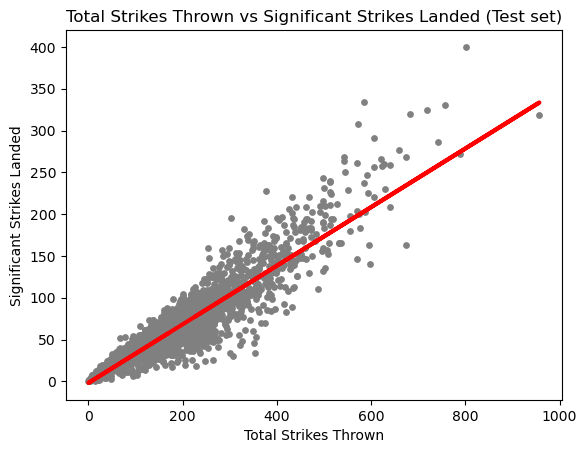

In [67]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Total Strikes Thrown vs Significant Strikes Landed (Test set)')
plot_test.xlabel('Total Strikes Thrown')
plot_test.ylabel('Significant Strikes Landed')
plot_test.show()

In [68]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,48,78.014115
1,123,93.085547
2,88,63.643679
3,16,10.367919
4,81,65.045673
5,66,59.788197
6,93,143.206822
7,10,6.161938
8,35,63.994178
9,6,9.666922


In [69]:
# For the Model

In [70]:
#Slope: [[0.35515144]]
#Mean squared error:  386.3534615690214
#R2 score:  0.871611954390268

In [71]:
#For the prediction

In [72]:
#Slope: [[0.35049843]]
#Mean squared error:  434.9523933006195
#R2 score:  0.8592890387568579

In [ ]:
#Gave a better score, but not overfitted.